In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sstats
import os

In [29]:
results_dir = "/mnt/c/Users/Алексей/OneDrive/projects/uio/cmma/tests/experiment_8"
outf = "qq.Intelligence_SCZ_BIP_Height_IBD_T2D.png"
save = False
fig_title = "IIBDGC CD 2017" # "HapGen p=0.003 hsq=0.7"
# ctg_intelligence_2017
# giant_height_2018_ukb
# iibdgc_cd_2017
# iibdgc_ibd_2017
# lipids_ldl_2013
# lipids_tg_2013
# pgc_bip_2016
# pgc_scz_2014_eur
# ssgac_ea_2018_no23andme
# diagram_t2d_2018_adjbmi
# pgc_adhd_2017_eur
# ssgac_risk_2019
# giant_bmi_2015_eur
# giant_height_2014
titles = ["ctg_intelligence_2017",
          "pgc_scz_2014_eur",
          "iibdgc_ibd_2017"]
annot2use =['5UTR', '3UTR', 'Exon'] # ['5UTR', '3UTR', 'Exon', 'Intergenic']
qqfiles = ["qq.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.ctg_intelligence_2017.experiment_8.rsubset_500000.no_mhc.12.npz",
          "qq.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.pgc_scz_2014_eur.experiment_8.rsubset_500000.no_mhc.3.npz",
          "qq.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.iibdgc_ibd_2017.experiment_8.rsubset_500000.no_mhc.11.npz"]
qqfiles = [os.path.join(results_dir, qqf) for qqf in qqfiles]
TAB20_COLORS = {1:"#1f77b4", 2:"#aec7e8", 3:"#ff7f0e", 4:"#ffbb78",
                  5:"#2ca02c", 6:"#98df8a", 7:"#d62728", 8:"#ff9896",
                  9:"#9467bd", 10:"#c5b0d5", 11:"#8c564b", 12:"#c49c94",
                  13:"#e377c2", 14:"#f7b6d2", 15:"#7f7f7f", 16:"#c7c7c7",
                  17:"#bcbd22", 18:"#dbdb8d", 19:"#17becf", 20:"#9edae5"}
DATA_ANNOT_COLOR_IDX = [4,6,8,10,12]
MODEL_ANNOT_COLOR_IDX = [3,5,7,9,11]
n_rows = 1
n_cols = 3

['annot_names', 'data_total_x', 'data_total_y', 'data_annot_x', 'data_annot_y', 'model_total_x', 'model_annot_x', 'model_y']
['5UTR', '3UTR', 'Exon', 'Intron', '1kUp', '1kDown', '10kUp', '10kDown', 'Intergenic']


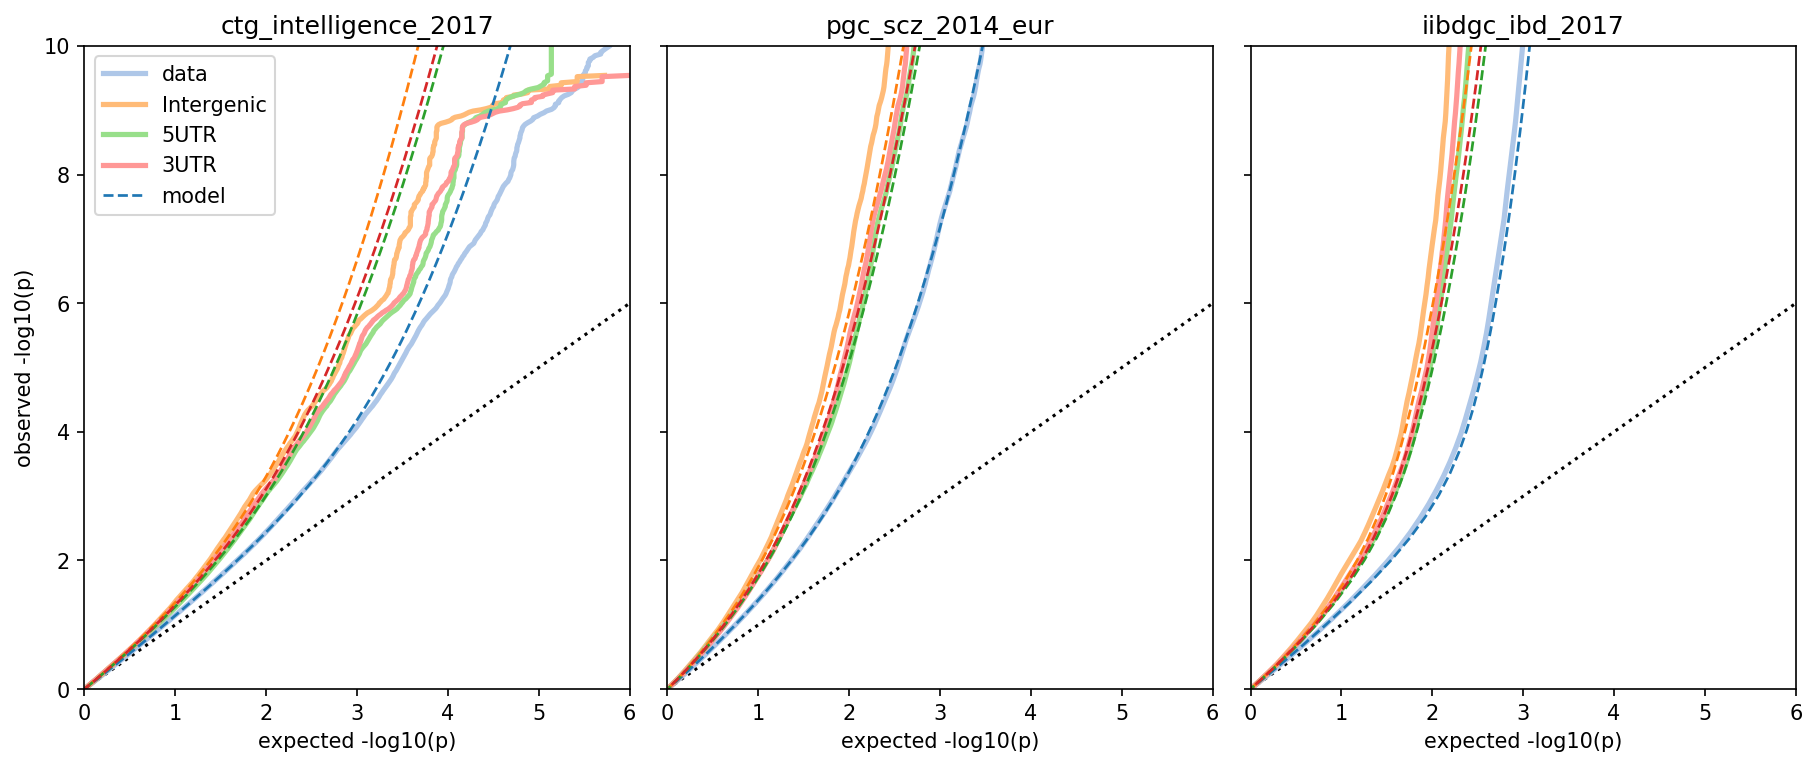

In [32]:
res = np.load(qqfiles[0])
print(list(res.keys()))
print(list(res["annot_names"]))
nrows = len(qqfiles)//2 + (0 if len(qqfiles)%2 == 0 else 1)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, sharey=True,
                        figsize=(12,5), dpi=150, constrained_layout=True) # (15,5)
# axs = [axs]
axs = axs.flatten()
for i, qqf in enumerate(qqfiles):
    ax = axs[i]
    x_lim = 6
    ax.plot([0,x_lim],[0,x_lim], ls=':', color='k')
    ax.set_title(titles[i])
    qq = np.load(qqf)
    annot = qq["annot_names"]
    # first plot all real data
    ax.plot(qq["data_total_x"], qq["data_total_y"], ls='-', lw=2.5, color=TAB20_COLORS[2], label="data")
    j = 0
    color_i = 0
    for a in annot:
        if a in annot2use:
            c = TAB20_COLORS[DATA_ANNOT_COLOR_IDX[color_i]]
            ax.plot(qq["data_annot_x"][j], qq["data_annot_y"][j], ls='-', lw=2.5, color=c, label=annot[j-1])
            color_i += 1
        j += 1
    # then plot modeled data
    ax.plot(qq["model_total_x"], qq["model_y"], ls='--', lw=1.3, color=TAB20_COLORS[1], label="model")
    j = 0
    color_i = 0
    for a in annot:
        if a in annot2use:
            c = TAB20_COLORS[MODEL_ANNOT_COLOR_IDX[color_i]]
            ax.plot(qq["model_annot_x"][:,j], qq["model_y"], ls='--', lw=1.3, color=c)
            color_i += 1
        j += 1
    ax.set_ylim((0,10))
    ax.set_xlim((0,x_lim))
    if i == 0:
        ax.legend(loc=0)
    if i%n_cols == 0:
        ax.set_ylabel("observed -log10(p)")
    if i >= (n_rows - 1)*n_cols:
        ax.set_xlabel("expected -log10(p)")
# _ = fig.suptitle(fig_title, fontsize=14)
# plt.tight_layout()
if save:
    plt.savefig(outf)

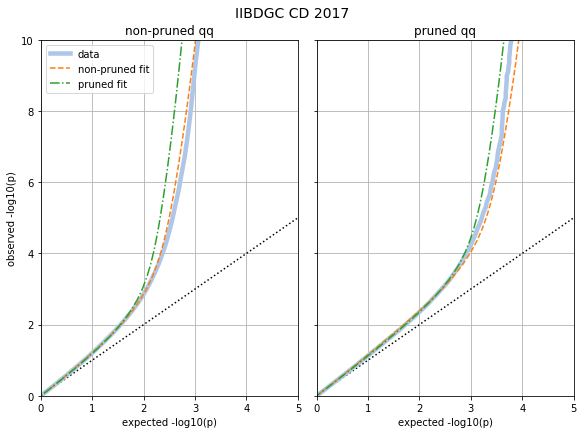

In [32]:
x_lim = 5
y_lim = 10
lw_data = 4.5
lw_model = 1.5
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, squeeze=True, sharey=True, figsize=(8,6), constrained_layout=True) # (15,5)

ax1.plot([0,x_lim],[0,x_lim], ls=':', color='k')
ax2.plot([0,x_lim],[0,x_lim], ls=':', color='k')

ax1.set_title("non-pruned qq")
ax2.set_title("pruned qq")

qq = np.load(qqfiles[0])
annot = qq["annot_names"]
ax1.plot(qq["data_total_x"], qq["data_total_y"], ls='-', lw=lw_data, color=TAB20_COLORS[2], label="data")
ax1.plot(qq["model_total_x"], qq["model_y"], ls='--', lw=lw_model, color=TAB20_COLORS[3], label="non-pruned fit")
qq = np.load(qqfiles[2])
ax1.plot(qq["model_total_x"], qq["model_y"], ls='-.', lw=lw_model, color=TAB20_COLORS[5], label="pruned fit")

qq = np.load(qqfiles[1])
annot = qq["annot_names"]
ax2.plot(qq["data_total_x"], qq["data_total_y"], ls='-', lw=lw_data, color=TAB20_COLORS[2], label="data")
ax2.plot(qq["model_total_x"], qq["model_y"], ls='--', lw=lw_model, color=TAB20_COLORS[3], label="non-pruned fit")
qq = np.load(qqfiles[3])
ax2.plot(qq["model_total_x"], qq["model_y"], ls='-.', lw=lw_model, color=TAB20_COLORS[5], label="pruned fit")

ax1.set_ylim((0,y_lim))
ax1.set_xlim((0,x_lim))
ax2.set_ylim((0,y_lim))
ax2.set_xlim((0,x_lim))

ax1.legend(loc=0)
ax1.set_ylabel("observed -log10(p)")
ax1.set_xlabel("expected -log10(p)")
ax2.set_xlabel("expected -log10(p)")
ax1.grid(True)
ax2.grid(True)
_ = fig.suptitle(fig_title, fontsize=14)
plt.savefig(outf)

In [23]:
annotations = ["chr21", "chr22"]
labels = ["both_same", "same_pi", "same_sigma", "both_free"]
results_dir = "/mnt/seagate10/projects/cmm/experiments/hapgen10k11m_chrs_21_22.chrs_21_22.fixed_or_free_pi_and_sigma/results"
qqfiles = [
    "modelqq.hapgen10k11m_chrs_21_22.chrs_21_22.sumstats.hapgen10k11m_chrs_21_22.chrs_21_22.chr_21_p001.chr_22_p0001.same_pi_sigma.run_1.npz",
    "modelqq.hapgen10k11m_chrs_21_22.chrs_21_22.sumstats.hapgen10k11m_chrs_21_22.chrs_21_22.chr_21_p001.chr_22_p0001.same_pi.run_1.npz",
    "modelqq.hapgen10k11m_chrs_21_22.chrs_21_22.sumstats.hapgen10k11m_chrs_21_22.chrs_21_22.chr_21_p001.chr_22_p0001.same_sigma.run_1.npz",
    "modelqq.hapgen10k11m_chrs_21_22.chrs_21_22.sumstats.hapgen10k11m_chrs_21_22.chrs_21_22.chr_21_p001.chr_22_p0001.run_1.npz"
    ]
qqfiles = [os.path.join(results_dir, qqf) for qqf in qqfiles]
qq = []
for i in range(len(qqfiles)):
    qqf = qqfiles[i]
    qq.append(np.load(qqf))
    
max_x = max(qq[0]["data_total_x"])
list(qq[0].keys())

['data_total_x',
 'data_total_y',
 'data_annot_x',
 'data_annot_y',
 'model_total_x',
 'model_annot_x',
 'model_y']

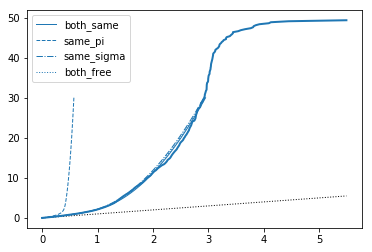

In [25]:
plt.plot([0,max_x], [0,max_x], ls=':', lw=1, color='k')
linestyles = ["-", "--", "-.", ":"]
for i in range(len(qqfiles)):
    color=f"C{i}"
    qq_data = qq[i]
    if i == 0:
        plt.plot(qq_data["data_total_x"], qq_data["data_total_y"], ls='-', lw=2, color="C0")
    plt.plot(qq_data["model_total_x"], qq_data["model_y"], ls=linestyles[i], lw=1, color="C0", label=labels[i])
_ = plt.legend(loc="best")

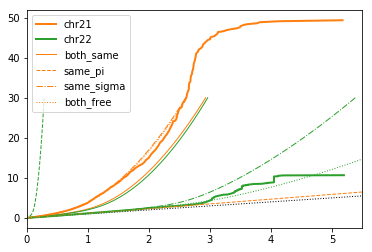

In [26]:
n_annot = len(qq[0]["data_annot_x"])
linestyles = ["-", "--", "-.", ":"]
plt.plot([0,max_x], [0,max_x], ls=':', lw=1, color='k')
# plot real data
for i in range(n_annot):
    qq_data = qq[0]
    c = f"C{i+1}"
    plt.plot(qq_data["data_annot_x"][i], qq_data["data_annot_y"][i], ls='-', lw=2, color=c, label=annotations[i])
# plot model
for j in range(len(qqfiles)):
    qq_data = qq[j]
    for i in range(n_annot):
        c = f"C{i+1}"
        if i == 0:
            plt.plot(qq_data["model_annot_x"][i], qq_data["model_y"], ls=linestyles[j], lw=1, color=c, label=labels[j])
        else:
            plt.plot(qq_data["model_annot_x"][i], qq_data["model_y"], ls=linestyles[j], lw=1, color=c)
plt.xlim((0,max_x))
_ = plt.legend(loc="best")

['data_total_x', 'data_total_y', 'data_annot_x', 'data_annot_y', 'model_total_x', 'model_annot_x', 'model_y']


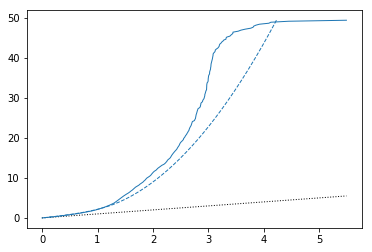

In [51]:
d = np.load("/mnt/seagate10/projects/cmm/experiments/hapgen10k11m_chrs_21_22.chrs_21_22.fixed_or_free_pi_and_sigma/results/qq.hapgen10k11m_chrs_21_22.chrs_21_22.sumstats.hapgen10k11m_chrs_21_22.chrs_21_22.chr_21_p001.chr_22_p0001.test.run_1.npz")
max_x = max(d["data_total_x"])
print(list(d.keys()))
plt.plot([0,max_x], [0,max_x], ls=':', lw=1, color='k')
plt.plot(d["data_total_x"], d["data_total_y"], ls='-', lw=1, color='C0')
plt.plot(d["model_total_x"], d["model_y"], ls='--', lw=1, color='C0')

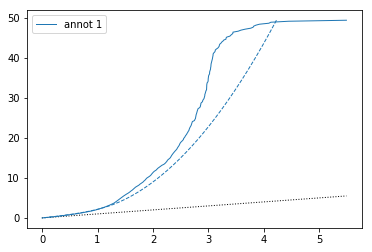

In [52]:
n_annot = len(d["data_annot_x"])
plt.plot([0,max_x], [0,max_x], ls=':', lw=1, color='k')
for i in range(n_annot):
    c = f"C{i}"
    l = f"annot {i+1}"
    plt.plot(d["data_annot_x"][i], d["data_annot_y"][i], ls='-', lw=1, color=c, label=l)
    plt.plot(d["model_annot_x"][i], d["model_y"], ls='--', lw=1, color=c)
_ = plt.legend()

In [19]:
res = np.load(qqfiles[0])

In [20]:
res["data_total_x"][:10]

array([7.87053220e-11, 2.39587727e-02, 4.78586949e-02, 7.15878954e-02,
       9.52387274e-02, 1.18838431e-01, 1.42294871e-01, 1.65532365e-01,
       1.88870339e-01, 2.12071866e-01])